#Seleccion del dataset

In [ ]:
#Se carga el dataset seleccionando el archivo Survey.csv
from google.colab import files
uploadedTrain = files.upload()

Saving survey.csv to survey.csv


In [ ]:
#Librerias usadas
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
#Lectura de los datos
survey_df = pd.read_csv(io.BytesIO(uploadedTrain['survey.csv']))

In [ ]:
num_filas = len(survey_df)
print("Cantidad de filas:", num_filas)

Cantidad de filas: 1259


In [ ]:
#Visualizacion de los datos segun el dataset original
survey_df.head(2)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN


#Preprocesamiento de datos

In [ ]:
#Variables seleccionadas para el estudio
caracteristicas = ['Gender',
    'Age',
    'self_employed',
    'treatment',
    'family_history',
    'work_interfere',
    'benefits',
    'care_options',
    'wellness_program',
    'seek_help',
    'anonymity',
    'mental_health_consequence',
    'mental_vs_physical']


datos_seleccionados = survey_df[caracteristicas]

In [ ]:
#Visualizacion de los datos segun el dataset modificado con las variables de estudio
datos_seleccionados.head(2)

,Gender,Age,self_employed,treatment,family_history,work_interfere,benefits,care_options,wellness_program,seek_help,anonymity,mental_health_consequence,mental_vs_physical
18,male,46,Yes,No,Yes,Sometimes,Yes,Not sure,Yes,Don't know,Yes,No,Yes
20,male,29,No,Yes,Yes,Sometimes,Yes,Yes,No,No,No,Maybe,No


In [ ]:
#Visualizacion de las diferentes respuestas de la variable de genero
unique_values = datos_seleccionados['Gender'].unique()
print(unique_values)

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [ ]:
datos_seleccionados['Gender'] = datos_seleccionados['Gender'].str.lower()

<ipython-input-9-d9fb05a2c07e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_seleccionados['Gender'] = datos_seleccionados['Gender'].str.lower()


In [ ]:
#Transformacion de la variable de genero para estandarizacion
datos_seleccionados['Gender'].replace(['m', 'male', 'man','male-ish','maile','cis male','mal','male (cis)','guy (-ish) ^_^','make','male ','msle','mail','malr','cis man'], 'male', inplace=True)
datos_seleccionados['Gender'].replace(['female','cis female','f','woman','femake','female ','cis-female/femme','female (cis)','femail'], 'female', inplace=True)
datos_seleccionados['Gender'].replace(['trans-female', 'something kinda male?', 'queer/she/they','non-binary', 'nah', 'all', 'enby', 'fluid', 'genderqueer', 'androgyne','agender', 'male leaning androgynous', 'trans woman', 'neuter','female (trans)', 'queer', 'a little about you', 'p','ostensibly male, unsure what that really means'], 'non_binary', inplace=True)

<ipython-input-10-a1f9bd6c9e3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_seleccionados['Gender'].replace(['m', 'male', 'man','male-ish','maile','cis male','mal','male (cis)','guy (-ish) ^_^','make','male ','msle','mail','malr','cis man'], 'male', inplace=True)
<ipython-input-10-a1f9bd6c9e3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_seleccionados['Gender'].replace(['female','cis female','f','woman','femake','female ','cis-female/femme','female (cis)','femail'], 'female', inplace=True)
<ipython-input-10-a1f9bd6c9e3e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [ ]:
#Visualizacion de la estandarizacion
unique_values = datos_seleccionados['Gender'].unique()
print(unique_values)

['female' 'male' 'non_binary']


In [ ]:
#Limpieza de valores nulos
cantidad_nulos = datos_seleccionados.isnull().sum()

# Mostrar la cantidad de nulos por columna
print(cantidad_nulos)

Gender                         0
Age                            0
self_employed                 18
treatment                      0
family_history                 0
work_interfere               264
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
mental_health_consequence      0
mental_vs_physical             0
dtype: int64


In [ ]:
datos_seleccionados.dropna(subset=['work_interfere'], inplace=True)
datos_seleccionados.dropna(subset=['self_employed'], inplace=True)

<ipython-input-13-640f0534c388>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_seleccionados.dropna(subset=['work_interfere'], inplace=True)
<ipython-input-13-640f0534c388>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_seleccionados.dropna(subset=['self_employed'], inplace=True)


In [ ]:
cantidad_nulos = datos_seleccionados.isnull().sum()
#Visualizacion de transformacion de los datos
# Mostrar la cantidad de nulos por columna
print(cantidad_nulos)

Gender                       0
Age                          0
self_employed                0
treatment                    0
family_history               0
work_interfere               0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
mental_health_consequence    0
mental_vs_physical           0
dtype: int64


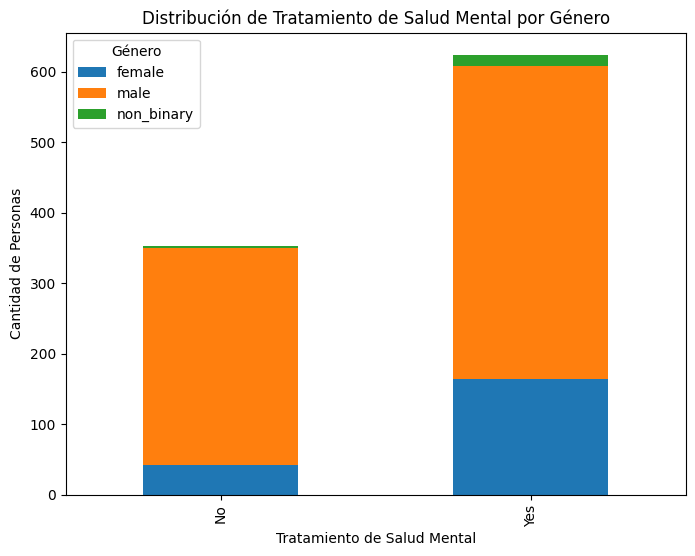

In [ ]:
# Primero, vamos a agrupar los datos por 'treatment' y 'gender' y contar cuántos registros hay en cada grupo.
grouped_data = datos_seleccionados.groupby(['treatment', 'Gender']).size().unstack()

# Luego, creamos el gráfico de barras apiladas
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(8, 6))

# Personalizamos el gráfico
ax.set_xlabel('Tratamiento de Salud Mental')
ax.set_ylabel('Cantidad de Personas')
ax.set_title('Distribución de Tratamiento de Salud Mental por Género')
ax.legend(title='Género')

# Mostramos el gráfico
plt.show()

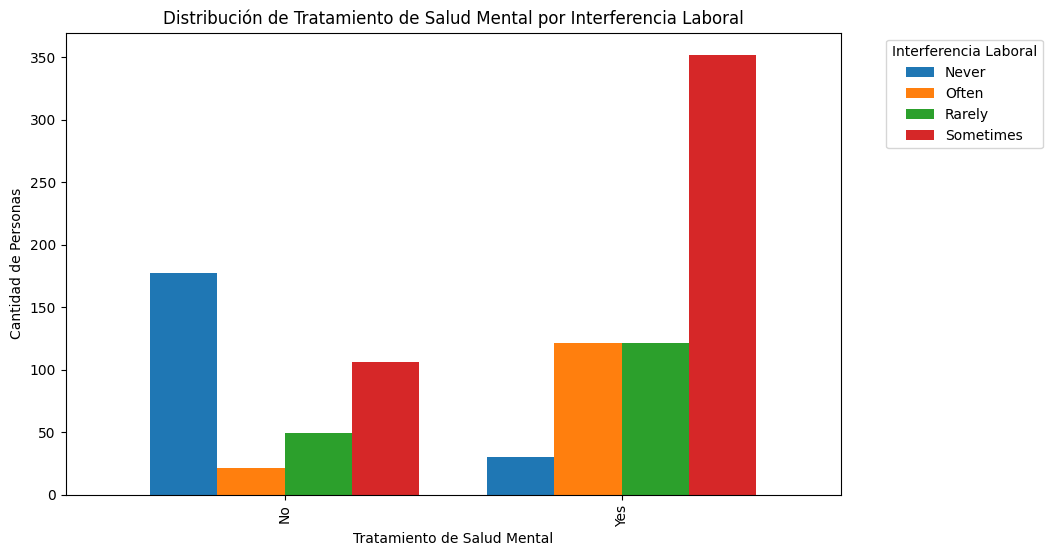

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que 'df' es tu DataFrame que contiene las columnas 'treatment' y 'work_interfere'
# y 'treatment' contiene valores 'Yes' o 'No', y 'work_interfere' contiene valores categóricos.

# Primero, vamos a agrupar los datos por 'treatment' y 'work_interfere' y contar cuántos registros hay en cada grupo.
grouped_data = datos_seleccionados.groupby(['treatment', 'work_interfere']).size().unstack()

# Luego, creamos el gráfico de barras agrupadas
ax = grouped_data.plot(kind='bar', figsize=(10, 6), width=0.8)

# Personalizamos el gráfico
ax.set_xlabel('Tratamiento de Salud Mental')
ax.set_ylabel('Cantidad de Personas')
ax.set_title('Distribución de Tratamiento de Salud Mental por Interferencia Laboral')
ax.legend(title='Interferencia Laboral', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostramos el gráfico
plt.show()


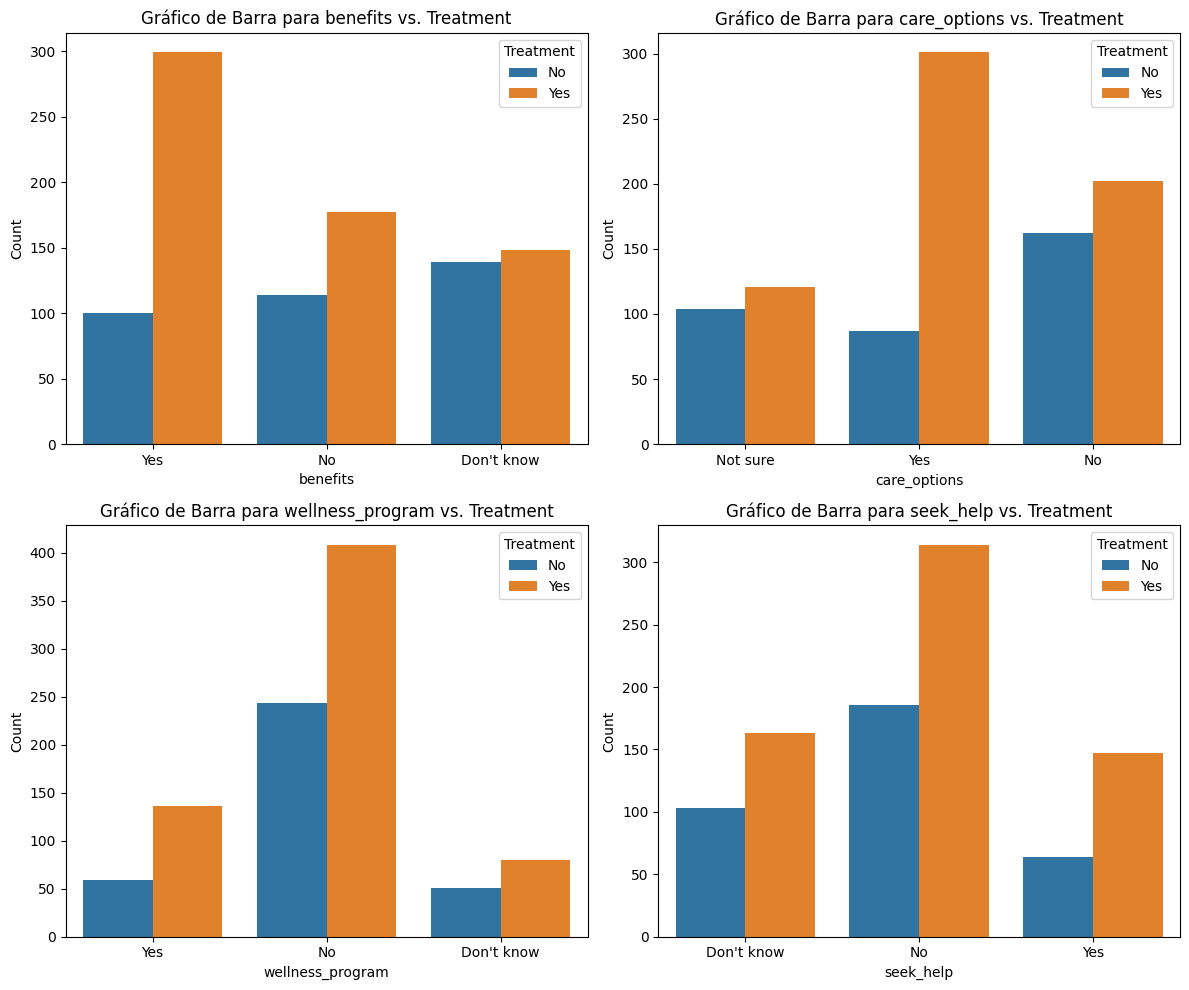

In [ ]:
columns_of_interest = [
    'benefits',
    'care_options',
    'wellness_program',
    'seek_help',
    'treatment'
]

# Seleccionamos solo las columnas de interés del DataFrame
data_subset = datos_seleccionados[columns_of_interest]

# Creamos la matriz de gráficos de barra utilizando seaborn
plt.figure(figsize=(12, 10))
plt.subplots_adjust(hspace=0.4)  # Espacio vertical entre gráficos

for i, feature in enumerate(['benefits', 'care_options', 'wellness_program', 'seek_help']):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=feature, hue='treatment', data=data_subset)
    plt.title(f'Gráfico de Barra para {feature} vs. Treatment')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Treatment', loc='upper right', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

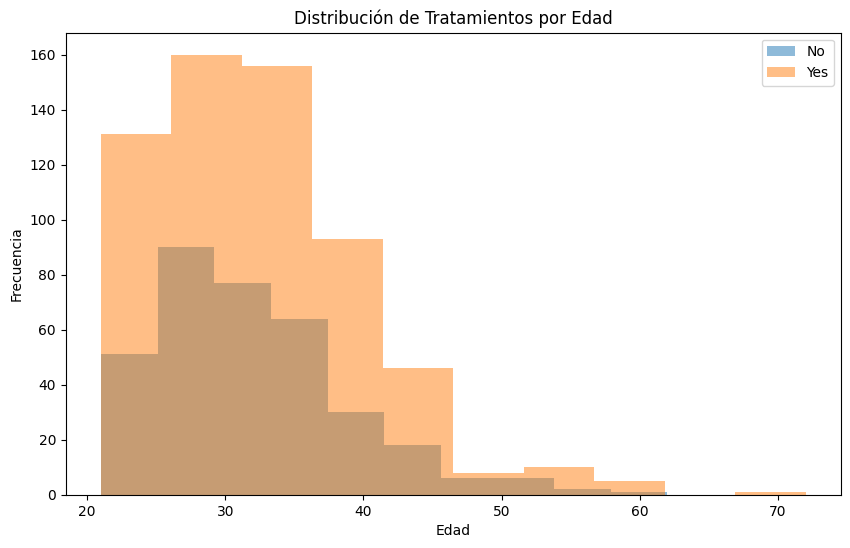

In [ ]:
grouped_data = datos_seleccionados.groupby(['treatment', 'Age']).size().unstack()

# Filtrar los datos seleccionados por rango de edad deseado, en este caso se utiza un rango de edad donde sean mayores a 21 que es la edad de adultez en US
# y se filtro en rango de edad maximo para evitar los valores atipicos
datos_seleccionados = datos_seleccionados[(datos_seleccionados['Age'] >= 21) & (datos_seleccionados['Age'] <= 100)]

treatments = datos_seleccionados['treatment'].unique()

# Graficar un histograma de 'treatment' por los grupos de edad creados
plt.figure(figsize=(10, 6)) # Establecer el tamaño de la figura

for treatment in treatments:
    # Obtener los datos de edad para el tratamiento actual
    age_data = datos_seleccionados[datos_seleccionados['treatment'] == treatment]['Age']

    # Graficar un histograma para el tratamiento actual
    plt.hist(age_data, bins=10, alpha=0.5, label=treatment)

# Etiquetas
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Tratamientos por Edad')

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()



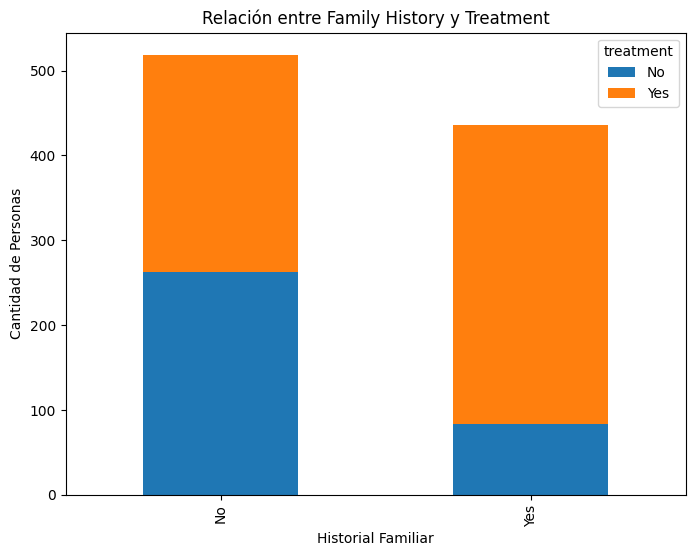

In [ ]:

# Crear una tabla de contingencia entre 'family_history' y 'treatment'
contingency_table = pd.crosstab(datos_seleccionados['family_history'], datos_seleccionados['treatment'])

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(8, 6))
contingency_table.plot(kind='bar', stacked=True, ax=ax)

# Personalizar el gráfico
ax.set_xlabel('Historial Familiar')
ax.set_ylabel('Cantidad de Personas')
ax.set_title('Relación entre Family History y Treatment')

# Mostrar el gráfico
plt.show()

In [ ]:
# Transformacion de los datos para ajustar el modelo
transformed = datos_seleccionados.copy()
for column in transformed.columns[:]:
#mapping = {value: i + 2 for i, value in enumerate(data[column].unique())}
  mapping = {value: i for i, value in enumerate(datos_seleccionados[column].unique())}
  transformed[column] = datos_seleccionados[column].map(mapping)

data = transformed
#Separar el conjunto de entrenamiento entre los conjuntos de características
X = data.drop(['treatment'], axis=1)
#Y la variable objetivo
y = data['treatment']

X.head(10)


,Gender,Age,self_employed,family_history,work_interfere,benefits,care_options,wellness_program,seek_help,anonymity,mental_health_consequence,mental_vs_physical
18,0,0,0,0,0,0,0,0,0,0,0,0
20,0,1,1,0,0,0,1,1,1,1,1,1
21,0,2,0,1,1,1,2,1,1,0,0,0
22,0,0,1,1,2,0,1,1,1,2,1,1
23,0,3,1,1,1,2,2,1,0,2,1,2
24,0,4,1,0,3,0,0,2,2,0,0,2
25,0,5,1,0,0,0,1,1,0,1,2,1
27,1,5,1,0,3,0,1,2,0,2,0,0
28,0,6,1,1,0,2,0,1,0,2,0,1
29,0,7,1,1,0,1,2,1,1,2,2,1


In [ ]:
# Encoding respetando escala de likert
transformed = datos_seleccionados.copy()
order = ['Never', 'Rarely', 'Sometimes', 'Often']
mapping = {value: i for i, value in enumerate(order)}

# Mapeo de work interfere en orden
transformed['work_interfere'] = datos_seleccionados['work_interfere'].map(mapping)

# Mapeo normal
for column in transformed.columns:
    if column != 'work_interfere':
        mapping = {value: i for i, value in enumerate(datos_seleccionados[column].unique())}
        transformed[column] = datos_seleccionados[column].map(mapping)

data = transformed

# Separación de features y label
X = data.drop(['treatment'], axis=1)
y = data['treatment']

X

,Gender,Age,self_employed,family_history,work_interfere,benefits,care_options,wellness_program,seek_help,anonymity,mental_health_consequence,mental_vs_physical
18,0,0,0,0,2,0,0,0,0,0,0,0
20,0,1,1,0,2,0,1,1,1,1,1,1
21,0,2,0,1,0,1,2,1,1,0,0,0
22,0,0,1,1,3,0,1,1,1,2,1,1
23,0,3,1,1,0,2,2,1,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1252,0,1,1,0,2,0,1,0,1,0,2,1
1253,0,19,1,0,1,2,2,0,2,2,1,2
1255,0,8,1,0,3,0,1,1,1,0,0,0
1256,0,6,1,0,2,0,1,1,1,2,2,1


#Creacion del modelo

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0165, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.19, random_state=42)

# Crear una instancia del clasificador de árbol de decisión
clf = DecisionTreeClassifier(max_depth=2)
#clf = DecisionTreeClassifier()

# Entrenar el modelo
clf.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Imprimir el reporte de clasificación
#target_names = data.target_names
#print(classification_report(y_test, y_pred, target_names=target_names))

Precisión del modelo: 0.8076923076923077


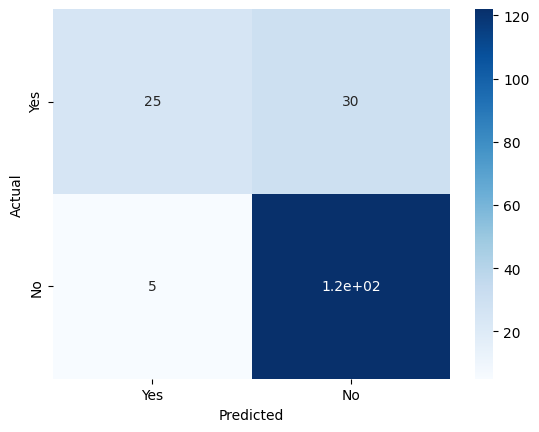

In [ ]:
#Visualizacion de los resultados
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
# matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

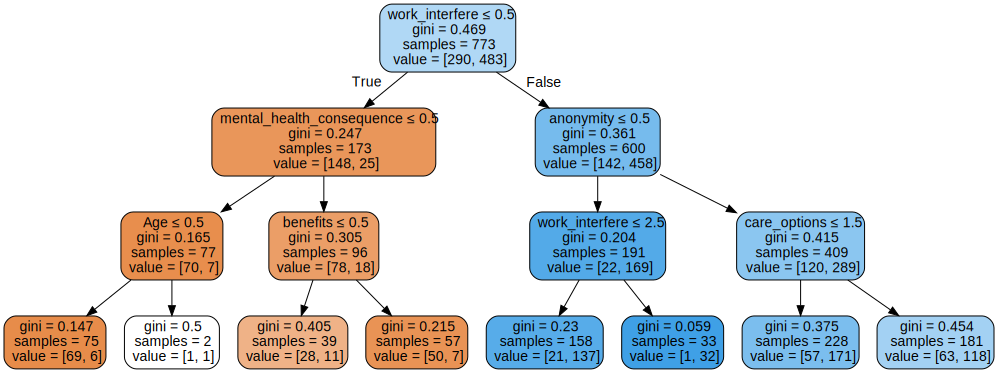

In [ ]:
#Visualizacion del arbol de decision creado
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(clf, out_file=None,feature_names=data.columns[1:],filled=True, rounded=True,special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("arbol_decision")

graph